<a href="https://colab.research.google.com/github/Amith07220/Sentimental-Analysis/blob/main/Assignment_8_C0937030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing libraries:
!pip install nltk spacy
!python -m nltk.downloader all
!python -m spacy download en_core_web_sm


<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping


# **PART 1: TEXT CLEANING**

In [2]:
sample_text = """
In the quiet town of Evermoor, Dr. Alina Verma discovered a rare astronomical event—a blue comet visible only once every 500 years.
Her team from the Orion Institute set up telescopes atop the Whispering Hills to capture the phenomenon.
The event drew scientists from Japan, Brazil, and South Africa, making it a global spectacle featured in National Geographic.
"""


In [3]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

cleaned_text = clean_text(sample_text)
print("Cleaned Text:\n", cleaned_text)


Cleaned Text:
 in the quiet town of evermoor dr alina verma discovered a rare astronomical eventa blue comet visible only once every years her team from the orion institute set up telescopes atop the whispering hills to capture the phenomenon the event drew scientists from japan brazil and south africa making it a global spectacle featured in national geographic


# **PART 2: TOKENIZATION**

In [4]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# Ensure required resources
nltk.download('punkt')

# Tokenize
sentences = sent_tokenize(cleaned_text)
words = word_tokenize(cleaned_text)

print("Sentence Tokens:\n", sentences)
print("\nWord Tokens:\n", words)


Sentence Tokens:
 ['in the quiet town of evermoor dr alina verma discovered a rare astronomical eventa blue comet visible only once every years her team from the orion institute set up telescopes atop the whispering hills to capture the phenomenon the event drew scientists from japan brazil and south africa making it a global spectacle featured in national geographic']

Word Tokens:
 ['in', 'the', 'quiet', 'town', 'of', 'evermoor', 'dr', 'alina', 'verma', 'discovered', 'a', 'rare', 'astronomical', 'eventa', 'blue', 'comet', 'visible', 'only', 'once', 'every', 'years', 'her', 'team', 'from', 'the', 'orion', 'institute', 'set', 'up', 'telescopes', 'atop', 'the', 'whispering', 'hills', 'to', 'capture', 'the', 'phenomenon', 'the', 'event', 'drew', 'scientists', 'from', 'japan', 'brazil', 'and', 'south', 'africa', 'making', 'it', 'a', 'global', 'spectacle', 'featured', 'in', 'national', 'geographic']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# ***PART 3: STOPWORD REMOVAL: ***

In [5]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

print("Original Word Count:", len(words))
print("After Stopword Removal:", len(filtered_words))
print("Filtered Words:\n", filtered_words)

# Vocabulary Comparison
vocab_before = set(words)
vocab_after = set(filtered_words)
print("Vocabulary Size Before:", len(vocab_before))
print("Vocabulary Size After:", len(vocab_after))


Original Word Count: 57
After Stopword Removal: 38
Filtered Words:
 ['quiet', 'town', 'evermoor', 'dr', 'alina', 'verma', 'discovered', 'rare', 'astronomical', 'eventa', 'blue', 'comet', 'visible', 'every', 'years', 'team', 'orion', 'institute', 'set', 'telescopes', 'atop', 'whispering', 'hills', 'capture', 'phenomenon', 'event', 'drew', 'scientists', 'japan', 'brazil', 'south', 'africa', 'making', 'global', 'spectacle', 'featured', 'national', 'geographic']
Vocabulary Size Before: 50
Vocabulary Size After: 38


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **PART 4: STEMMING AND LEMMATIZATION**

In [6]:
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
nltk.download('wordnet')

stemmer = PorterStemmer()
snowball = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

sample_words = ['discovered', 'visible', 'captured', 'scientists', 'featured',
                'global', 'spectacle', 'phenomenon', 'transition', 'event']

print(f"{'Word':<15}{'Porter':<15}{'Snowball':<15}{'Lemma':<15}")
for word in sample_words:
    print(f"{word:<15}{stemmer.stem(word):<15}{snowball.stem(word):<15}{lemmatizer.lemmatize(word, pos='v'):<15}")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Word           Porter         Snowball       Lemma          
discovered     discov         discov         discover       
visible        visibl         visibl         visible        
captured       captur         captur         capture        
scientists     scientist      scientist      scientists     
featured       featur         featur         feature        
global         global         global         global         
spectacle      spectacl       spectacl       spectacle      
phenomenon     phenomenon     phenomenon     phenomenon     
transition     transit        transit        transition     
event          event          event          event          


# **PART 5: POS TAGGING**

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


POS Tags:
 [('in', 'IN'), ('the', 'DT'), ('quiet', 'JJ'), ('town', 'NN'), ('of', 'IN'), ('evermoor', 'JJ'), ('dr', 'JJ'), ('alina', 'NN'), ('verma', 'NN'), ('discovered', 'VBD'), ('a', 'DT'), ('rare', 'JJ'), ('astronomical', 'JJ'), ('eventa', 'NN'), ('blue', 'NN'), ('comet', 'VBD'), ('visible', 'JJ'), ('only', 'RB'), ('once', 'RB'), ('every', 'DT'), ('years', 'NNS'), ('her', 'PRP$'), ('team', 'NN'), ('from', 'IN'), ('the', 'DT'), ('orion', 'NN'), ('institute', 'NN'), ('set', 'VBN'), ('up', 'RP'), ('telescopes', 'NNS'), ('atop', 'IN'), ('the', 'DT'), ('whispering', 'VBG'), ('hills', 'NNS'), ('to', 'TO'), ('capture', 'VB'), ('the', 'DT'), ('phenomenon', 'NN'), ('the', 'DT'), ('event', 'NN'), ('drew', 'VBD'), ('scientists', 'NNS'), ('from', 'IN'), ('japan', 'NN'), ('brazil', 'NN'), ('and', 'CC'), ('south', 'JJ'), ('africa', 'NN'), ('making', 'VBG'), ('it', 'PRP'), ('a', 'DT'), ('global', 'JJ'), ('spectacle', 'NN'), ('featured', 'VBN'), ('in', 'IN'), ('national', 'JJ'), ('geographic', 'NN'

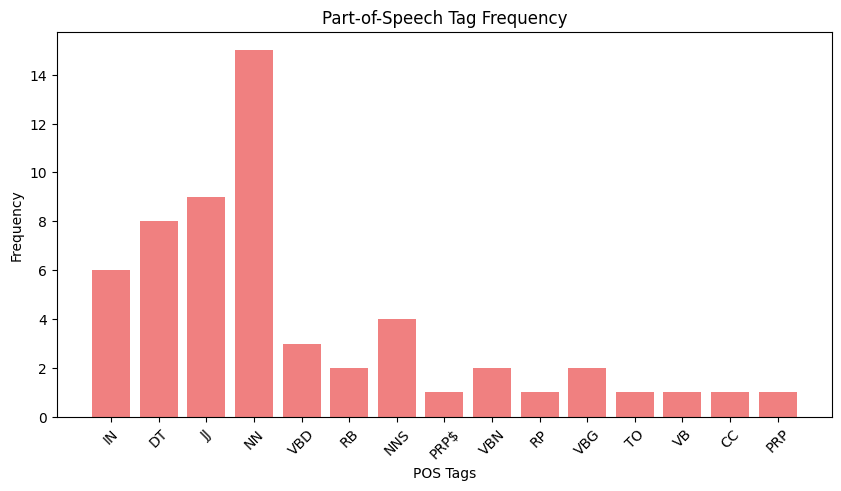

In [7]:
nltk.download('averaged_perceptron_tagger')

pos_tags = nltk.pos_tag(words)
print("POS Tags:\n", pos_tags)

# Count frequency
from collections import Counter
import matplotlib.pyplot as plt

tag_counts = Counter(tag for word, tag in pos_tags)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(tag_counts.keys(), tag_counts.values(), color='lightcoral')
plt.title("Part-of-Speech Tag Frequency")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


# **PART 6: NAMED ENTITY RECOGNITION**

In [8]:
import spacy
from spacy import displacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")
doc = nlp(sample_text)

# Print named entities
print("Named Entities Found:")
for ent in doc.ents:
    print(ent.text, "-", ent.label_)

# Visualize entities in Colab
displacy.render(doc, style="ent", jupyter=True)


Named Entities Found:
Alina Verma - PERSON
every 500 years - DATE
the Orion Institute - ORG
the Whispering Hills - GPE
Japan - GPE
Brazil - GPE
South Africa - GPE
National Geographic - ORG
